<a href="https://colab.research.google.com/github/suparna-kouri/portfolio-template/blob/main/iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IRIS FLOWERS CLASSIFICATION ML PROJECT**

We all know about Iris dataset and it contains features of diffrent flower species.Independent features in this dataset are sepal length,sepal width,petal length,petal width were in centimetres.Dependent feature which will be the output for the model is species

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

**Reading the data from csv file**

In [ ]:
# Reading Iris dataset from csv file using pandas
data = pd.read_csv('Iris.csv')

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data.shape


(150, 6)

In [ ]:
data.size

900

In [ ]:


# Checking datatypes for all features
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [ ]:
data[data.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [ ]:

# Describe function gives the basic numerical info about data for each numeric feature..
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**Data Visualization**

**Histogram**

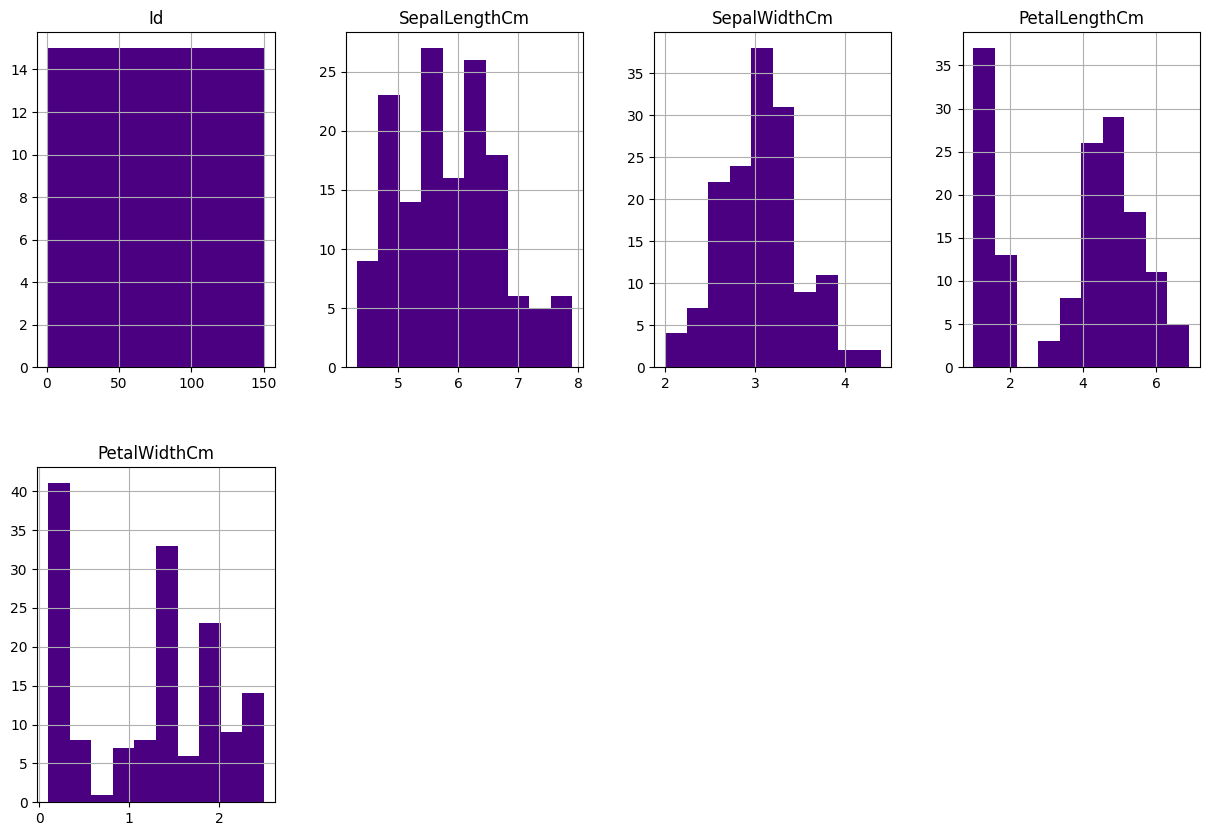

In [ ]:
data.hist(figsize=(15,10), layout=(2,4), color="indigo");

**Box Plot**

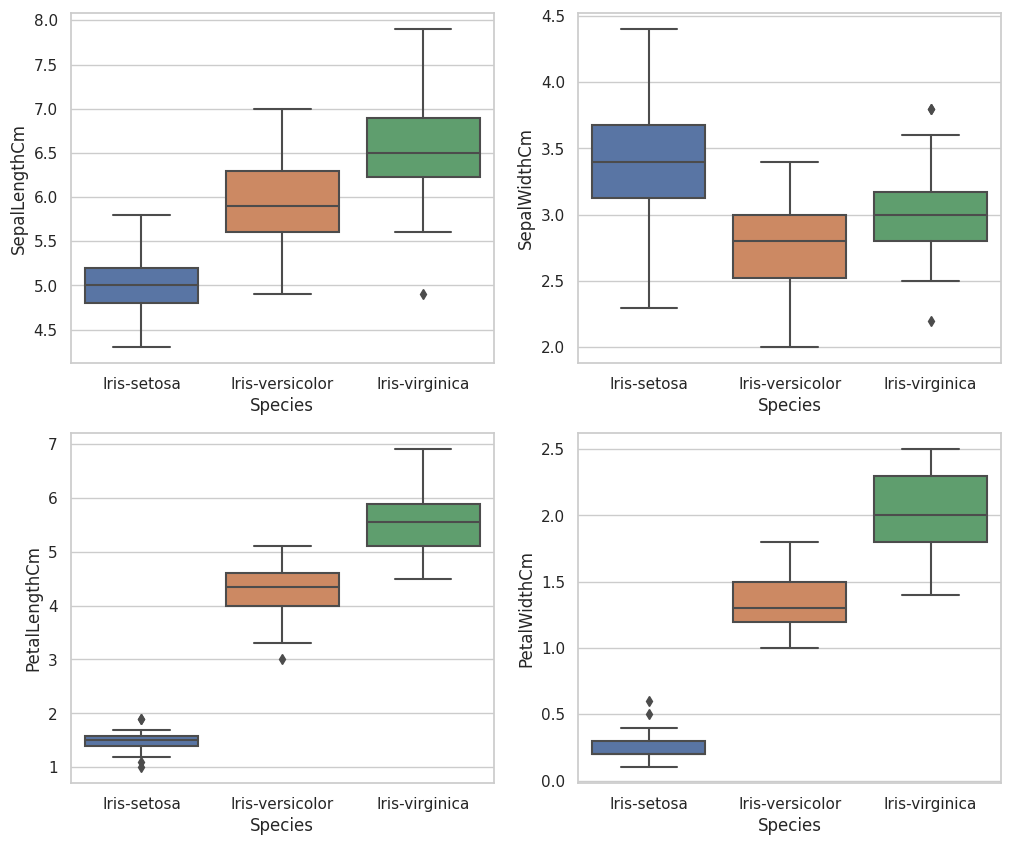

In [ ]:
# Box Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='SepalWidthCm',data=data)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='PetalWidthCm',data=data)
plt.show()

**Violin Plot**

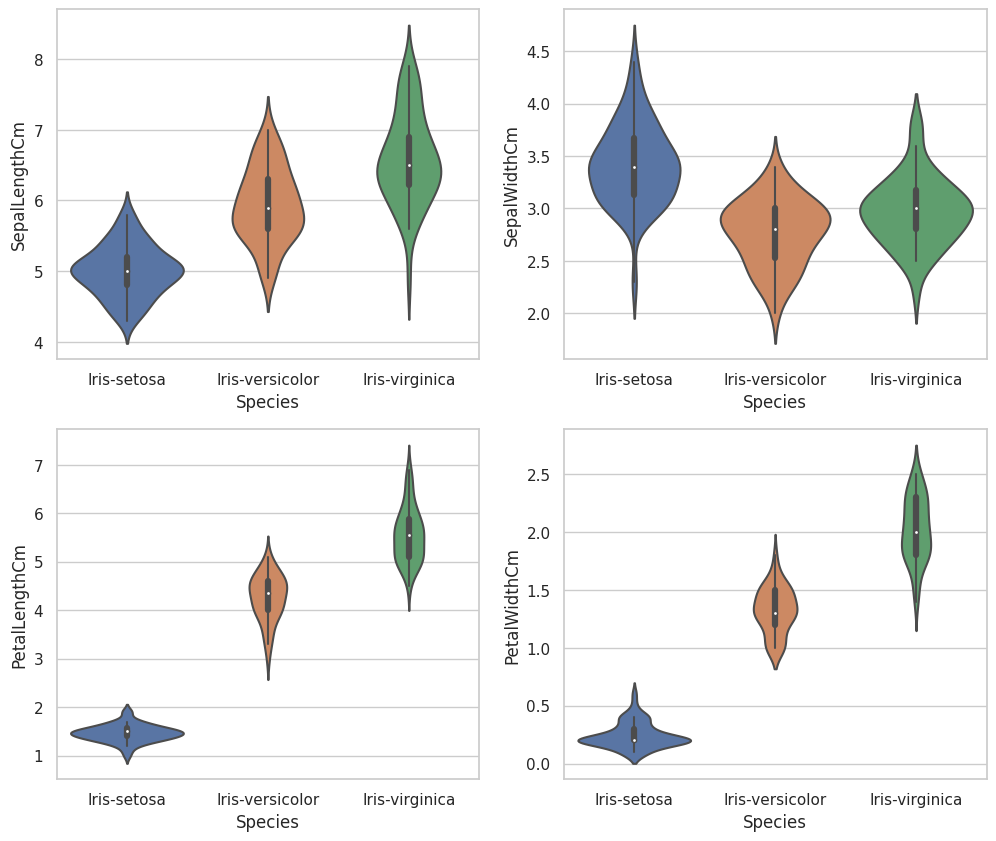

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.show()

**Pair Plot**

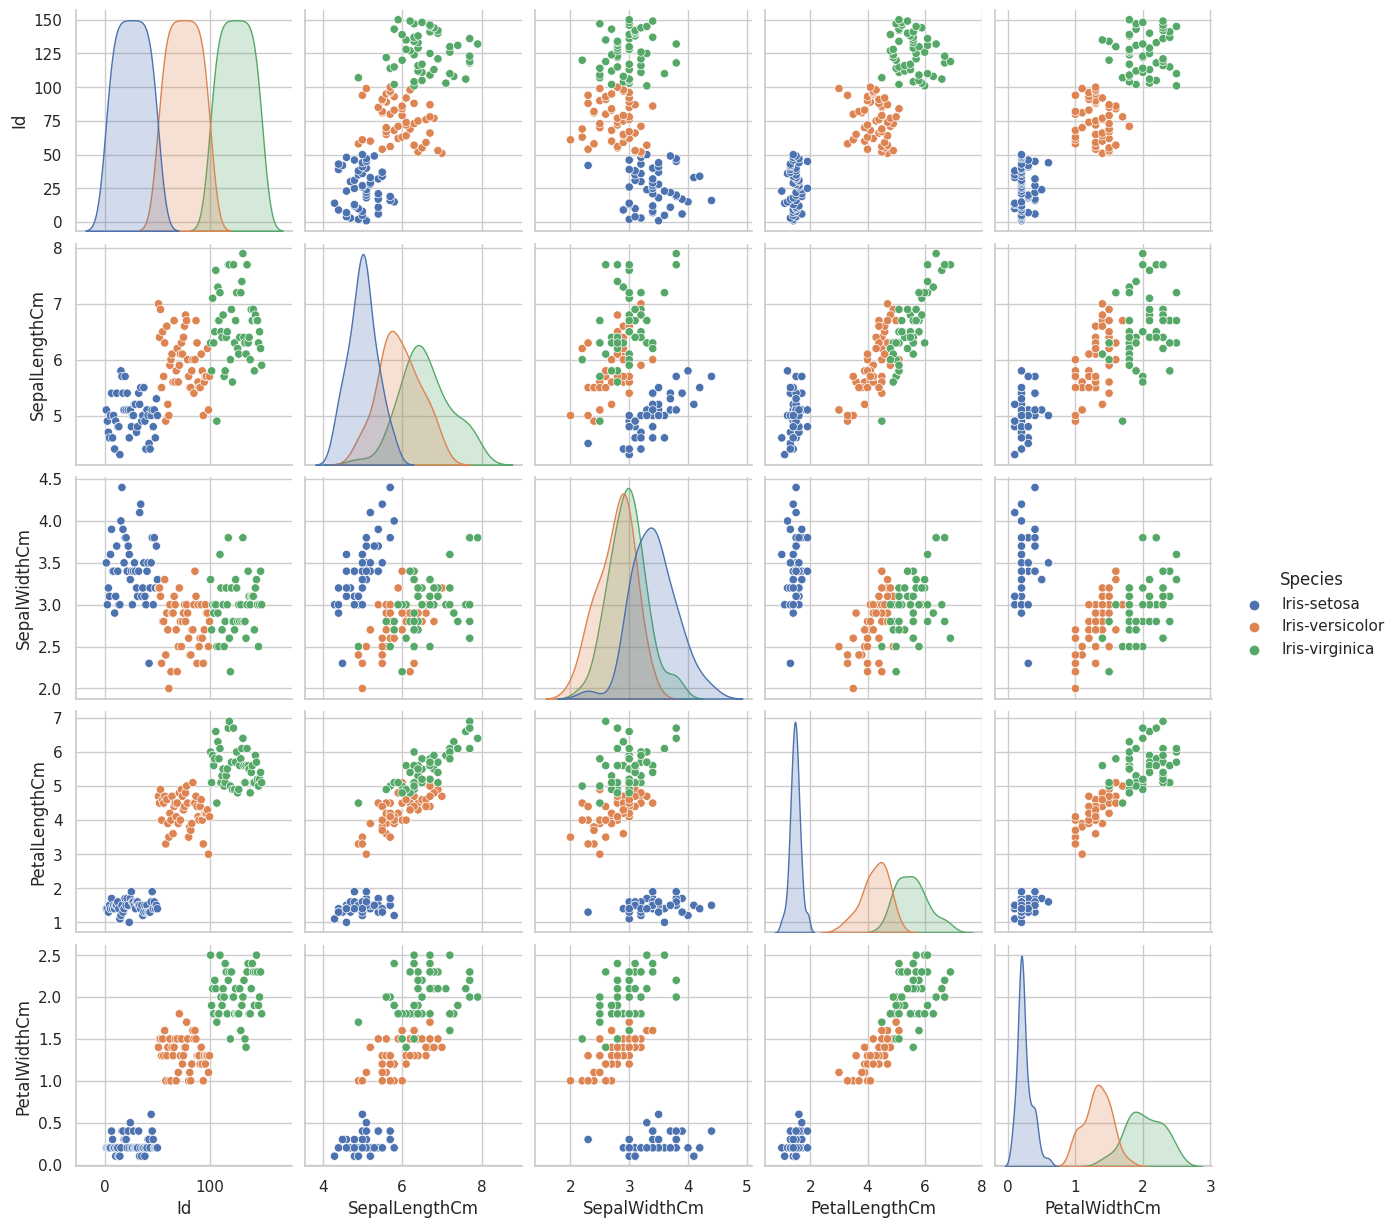

In [ ]:
sns.pairplot(data=data, hue='Species')
plt.show()

**Correlation Matrix**

<ipython-input-26-06f81467c92d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True);


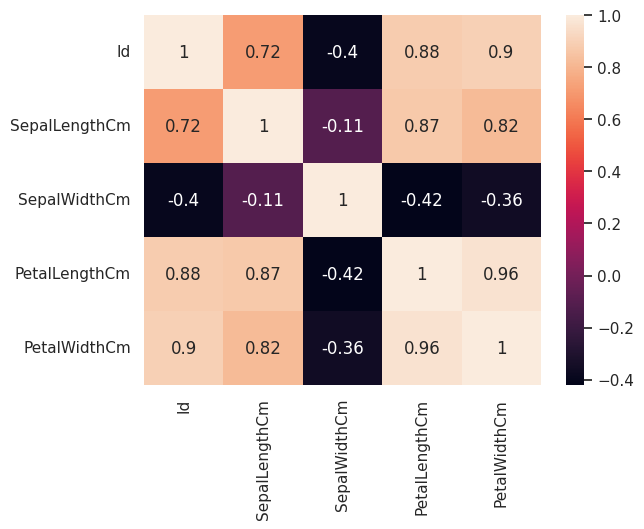

In [ ]:
sns.heatmap(data.corr(), annot=True);

**Preprocessing the data**

In [ ]:
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train) 

#Test the model
predictions = model.predict(x_test)
print("\nPrediction :\n")
print(predictions)

#Check precision, recall, f1-score
print("\nClassification Report :\n")
print( classification_report(y_test, predictions))

print("\nAccuracy score of Logistic Regression is :",accuracy_score(y_test, predictions))


Prediction :

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']

Classification Report :

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Accuracy score of Logistic Regression is : 1.0


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**K-Nearest Neighbours**

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))

# Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

# Accuracy score
print('\nAccuracy score of K-Nearest Neighbours is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy score of K-Nearest Neighbours is 1.0


**Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print('\nAccuracy score of SVM is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy score of SVM is 1.0


**Conclusion**

In this project, we learned to train our own supervised machine learning model using Iris flower classification with machine learning. Through this project we learned about machine learning, data analysis, data visualization and model creation.